In [100]:
import komm
import numpy as np
import matplotlib.pyplot as plt

In [115]:
qammod = komm.QAModulation(16)
awgn = komm.AWGNChannel(snr=10.0, signal_power=1.0)
pulse = komm.RectangularPulse(width=1.0)

data = np.random.randint(0, 2, 1000)

modulated = qammod.modulate(data)

real = np.real(modulated)
imag = np.imag(modulated)

tramsmit_filter = komm.TransmitFilter(pulse, 50)

t = np.linspace(0, 100, 250)

w0 = 2 * np.pi * 10000000
real_nrz = tramsmit_filter(real * np.cos(w0 * t))
imag_nrz = tramsmit_filter(imag * -np.sin(w0 * t))

noise_real = awgn(real)
noise_imag = awgn(imag)

noisy = noise_real + 1j * noise_imag

demodulated = qammod.demodulate(noisy)

# xor the data with the received data to get the number of bit errors
errors = np.sum(np.bitwise_xor(data, demodulated))
print(errors)

0


/home/gabrielluizep/code/workbook-eng-telecom/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/gabrielluizep/code/workbook-eng-telecom/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


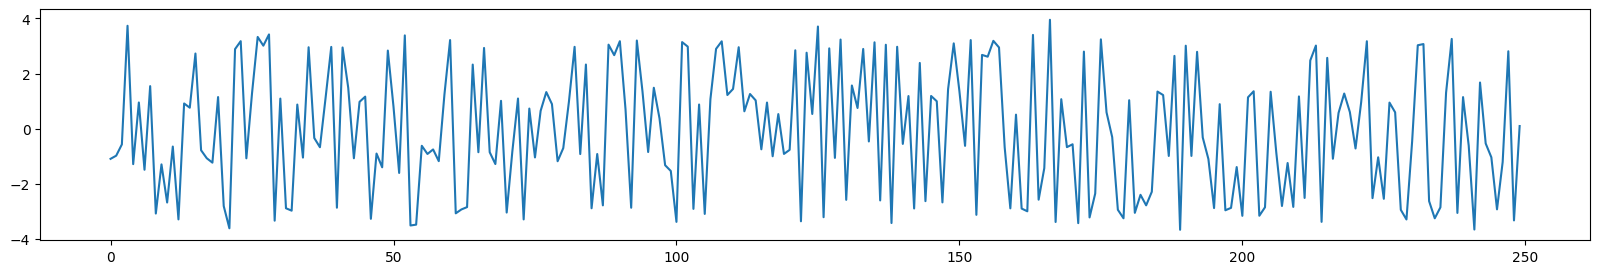

In [117]:
plt.figure(figsize=(20, 3))
plt.plot(noisy)

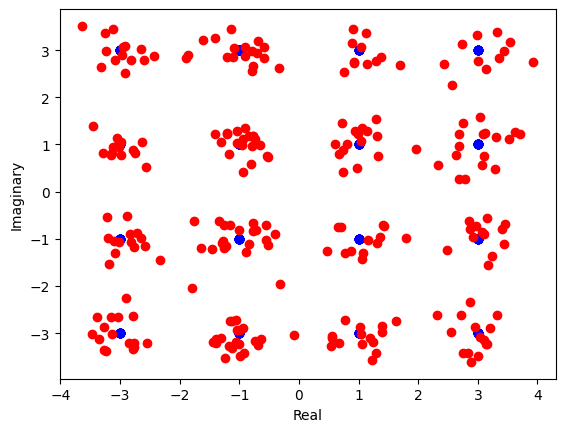

In [113]:
fig, ax = plt.subplots(1, 1)

ax.scatter(np.real(modulated), np.imag(modulated), c="b", label="Transmitted")
ax.scatter(noisy.real, noisy.imag, c="r", label="Received")

ax.set_xlabel("Real")
ax.set_ylabel("Imaginary")

plt.show()